In [1]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)

# 数据集划分

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/quoniam/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 归一化

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 训练

In [7]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [9]:
import sys
sys.path.append('../commonLib')

In [10]:
import pdr_sklearn as pdk

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [15]:
pdk.plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.legend(loc='upper right')

绘制测试数据
[[ 0.70793846  1.50872803]
 [ 0.09545238 -0.29145882]
 [-1.35224199 -1.32013702]
 [ 1.37610509  0.73721938]
 [-1.29656144 -1.32013702]
 [ 1.20906343  1.6373128 ]
 [-1.40792255 -1.19155225]
 [ 0.48521625  0.35146505]
 [ 0.5408968   0.22288028]
 [ 0.09545238  0.0942955 ]
 [ 0.98634122  0.22288028]
 [ 0.37385514  0.35146505]
 [ 0.48521625 -0.03428927]
 [ 0.42953569  0.35146505]
 [ 0.48521625  0.22288028]
 [-1.29656144 -1.4487218 ]
 [ 0.37385514  0.35146505]
 [ 0.31817459 -0.03428927]
 [-1.35224199 -1.19155225]
 [-1.40792255 -1.06296747]
 [ 0.59657735  0.99438893]
 [ 0.37385514  0.35146505]
 [-1.07383923 -1.32013702]
 [-1.35224199 -1.32013702]
 [ 0.5408968   0.73721938]
 [-1.57496421 -1.32013702]
 [-1.07383923 -1.06296747]
 [ 0.26249403  0.0942955 ]
 [-0.29431149 -0.29145882]
 [-1.24088089 -1.06296747]
 [ 0.93066067  0.73721938]
 [ 0.37385514  0.35146505]
 [-1.29656144 -1.32013702]
 [ 0.59657735  0.73721938]
 [ 0.98634122  1.25155848]
 [ 0.03977182  0.22288028]
 [-1.18520034 -1.1915

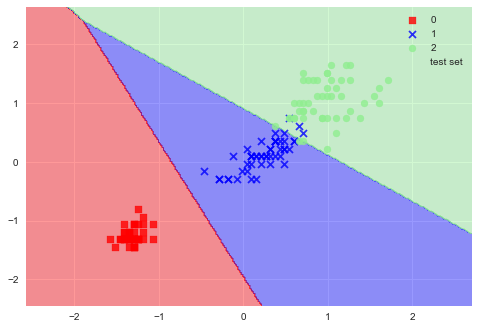

In [16]:
plt.show()

In [17]:
lr.predict_proba(X_test_std[0, :])

/home/quoniam/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

# 通过正则化解决过拟合问题

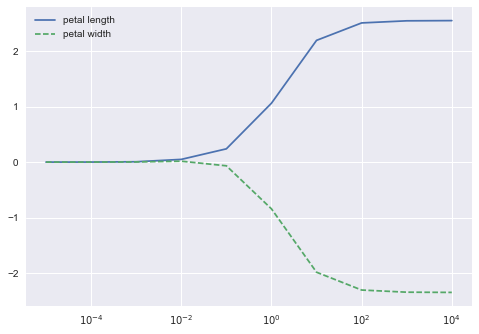

In [23]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], label='petal width', linestyle='--')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()